2.6.0
17473536/17464789 [==============================] - 1s 0us/step


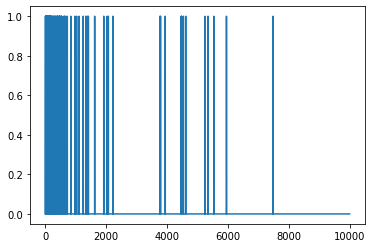

In [ ]:
#在本笔记本中，我们将探讨两种常见的正则化技术（权重正则化和辍学），并使用它们来改进我们的IMDB电影评论分类笔记本。
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

#下载数据集
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

plt.plot(train_data[0])

In [ ]:
train_data.shape

(25000, 10000)

In [ ]:
#证明过度拟合
# 基准模型
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
baseline_history = baseline_model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)

Epoch 1/20
49/49 - 5s - loss: 0.4857 - accuracy: 0.7971 - binary_crossentropy: 0.4857 - val_loss: 0.3314 - val_accuracy: 0.8764 - val_binary_crossentropy: 0.3314
Epoch 2/20
49/49 - 1s - loss: 0.2440 - accuracy: 0.9124 - binary_crossentropy: 0.2440 - val_loss: 0.2852 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2852
Epoch 3/20
49/49 - 1s - loss: 0.1782 - accuracy: 0.9392 - binary_crossentropy: 0.1782 - val_loss: 0.2904 - val_accuracy: 0.8853 - val_binary_crossentropy: 0.2904
Epoch 4/20
49/49 - 1s - loss: 0.1450 - accuracy: 0.9520 - binary_crossentropy: 0.1450 - val_loss: 0.3117 - val_accuracy: 0.8797 - val_binary_crossentropy: 0.3117
Epoch 5/20
49/49 - 1s - loss: 0.1183 - accuracy: 0.9619 - binary_crossentropy: 0.1183 - val_loss: 0.3404 - val_accuracy: 0.8758 - val_binary_crossentropy: 0.3404
Epoch 6/20
49/49 - 1s - loss: 0.0997 - accuracy: 0.9690 - binary_crossentropy: 0.0997 - val_loss: 0.3719 - val_accuracy: 0.8707 - val_binary_crossentropy: 0.3719
Epoch 7/20
49/49 - 1s - loss

In [ ]:
# 缩小参数
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [ ]:
smaller_history = smaller_model.fit(train_data,
                  train_labels,
                  epochs=20,
                  batch_size=512,
                  validation_data=(test_data, test_labels),
                  verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.5888 - accuracy: 0.6916 - binary_crossentropy: 0.5888 - val_loss: 0.5324 - val_accuracy: 0.7965 - val_binary_crossentropy: 0.5324
Epoch 2/20
49/49 - 1s - loss: 0.4843 - accuracy: 0.8501 - binary_crossentropy: 0.4843 - val_loss: 0.4897 - val_accuracy: 0.8461 - val_binary_crossentropy: 0.4897
Epoch 3/20
49/49 - 1s - loss: 0.4373 - accuracy: 0.8942 - binary_crossentropy: 0.4373 - val_loss: 0.4748 - val_accuracy: 0.8469 - val_binary_crossentropy: 0.4748
Epoch 4/20
49/49 - 1s - loss: 0.4030 - accuracy: 0.9202 - binary_crossentropy: 0.4030 - val_loss: 0.4562 - val_accuracy: 0.8714 - val_binary_crossentropy: 0.4562
Epoch 5/20
49/49 - 1s - loss: 0.3753 - accuracy: 0.9368 - binary_crossentropy: 0.3753 - val_loss: 0.4482 - val_accuracy: 0.8729 - val_binary_crossentropy: 0.4482
Epoch 6/20
49/49 - 1s - loss: 0.3524 - accuracy: 0.9479 - binary_crossentropy: 0.3524 - val_loss: 0.4409 - val_accuracy: 0.8764 - val_binary_crossentropy: 0.4409
Epoch 7/20
49/49 - 1s - loss

In [ ]:
# 更大的模型
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bigger_history = bigger_model.fit(train_data, train_labels,
                  epochs=20,
                  batch_size=512,
                  validation_data=(test_data, test_labels),
                  verbose=2)

Epoch 1/20
49/49 - 16s - loss: 0.3465 - accuracy: 0.8482 - binary_crossentropy: 0.3465 - val_loss: 0.2853 - val_accuracy: 0.8848 - val_binary_crossentropy: 0.2853
Epoch 2/20
49/49 - 16s - loss: 0.1354 - accuracy: 0.9510 - binary_crossentropy: 0.1354 - val_loss: 0.3575 - val_accuracy: 0.8649 - val_binary_crossentropy: 0.3575
Epoch 3/20
49/49 - 15s - loss: 0.0411 - accuracy: 0.9884 - binary_crossentropy: 0.0411 - val_loss: 0.4609 - val_accuracy: 0.8691 - val_binary_crossentropy: 0.4609
Epoch 4/20
49/49 - 15s - loss: 0.0056 - accuracy: 0.9991 - binary_crossentropy: 0.0056 - val_loss: 0.6018 - val_accuracy: 0.8681 - val_binary_crossentropy: 0.6018
Epoch 5/20
49/49 - 15s - loss: 0.0014 - accuracy: 1.0000 - binary_crossentropy: 0.0014 - val_loss: 0.6800 - val_accuracy: 0.8711 - val_binary_crossentropy: 0.6800
Epoch 6/20
49/49 - 15s - loss: 2.7350e-04 - accuracy: 1.0000 - binary_crossentropy: 2.7350e-04 - val_loss: 0.7384 - val_accuracy: 0.8706 - val_binary_crossentropy: 0.7384
Epoch 7/20
49/

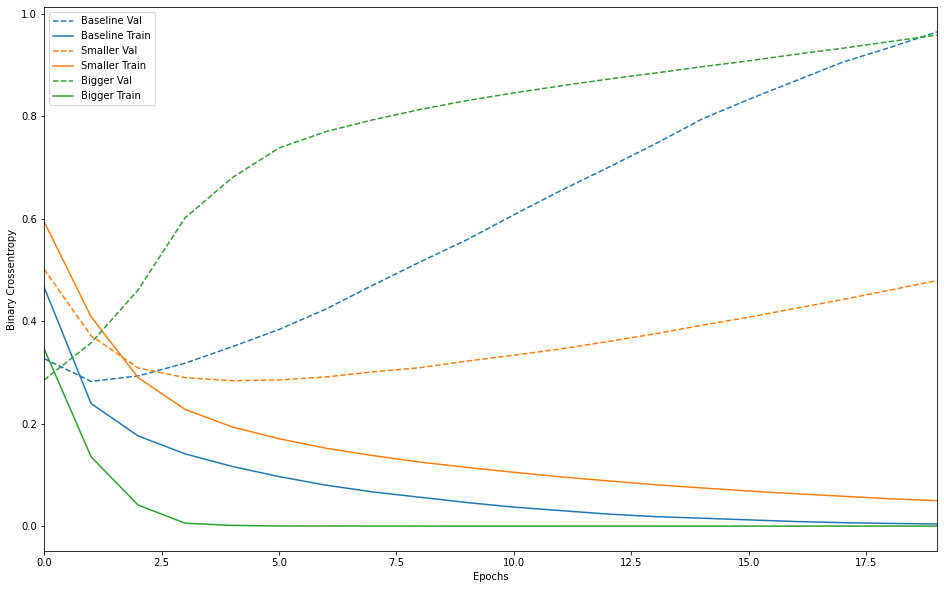

In [ ]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

plot_history([('baseline', baseline_history),
      ('smaller', smaller_history),
      ('bigger', bigger_history)])

In [ ]:
#绘制训练和验证损失
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                epochs=20,
                batch_size=512,
                validation_data=(test_data, test_labels),
                verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.5344 - accuracy: 0.7885 - binary_crossentropy: 0.4942 - val_loss: 0.3861 - val_accuracy: 0.8774 - val_binary_crossentropy: 0.3434
Epoch 2/20
49/49 - 2s - loss: 0.3051 - accuracy: 0.9100 - binary_crossentropy: 0.2579 - val_loss: 0.3357 - val_accuracy: 0.8885 - val_binary_crossentropy: 0.2853
Epoch 3/20
49/49 - 2s - loss: 0.2500 - accuracy: 0.9310 - binary_crossentropy: 0.1972 - val_loss: 0.3415 - val_accuracy: 0.8849 - val_binary_crossentropy: 0.2867
Epoch 4/20
49/49 - 2s - loss: 0.2250 - accuracy: 0.9435 - binary_crossentropy: 0.1688 - val_loss: 0.3539 - val_accuracy: 0.8817 - val_binary_crossentropy: 0.2965
Epoch 5/20
49/49 - 2s - loss: 0.2096 - accuracy: 0.9506 - binary_crossentropy: 0.1510 - val_loss: 0.3707 - val_accuracy: 0.8766 - val_binary_crossentropy: 0.3110
Epoch 6/20
49/49 - 2s - loss: 0.1985 - accuracy: 0.9550 - binary_crossentropy: 0.1378 - val_loss: 0.3860 - val_accuracy: 0.8737 - val_binary_crossentropy: 0.3247
Epoch 7/20
49/49 - 2s - loss

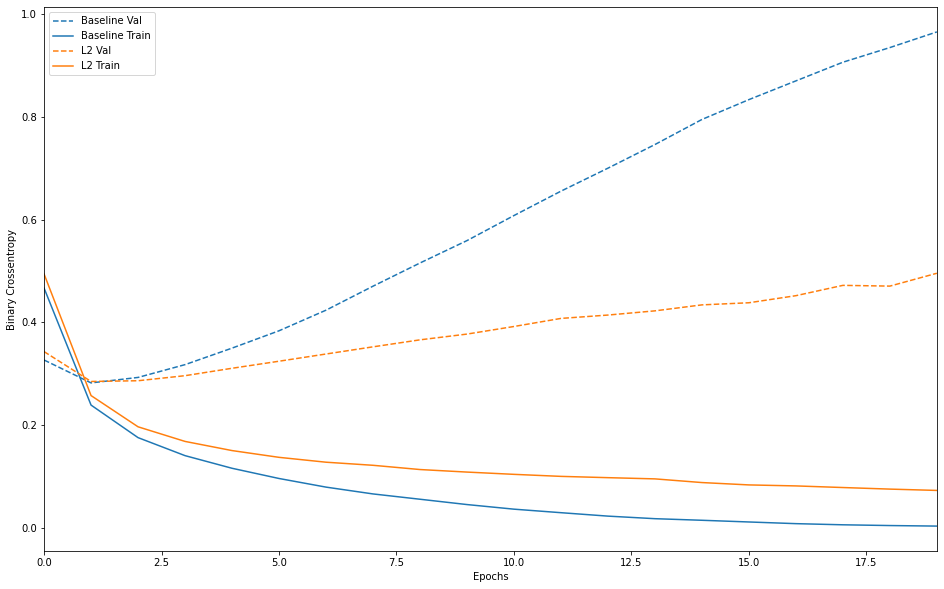

In [ ]:
plot_history([('baseline', baseline_history),
      ('l2', l2_model_history)])

In [ ]:
#使用dropout
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                  epochs=20,
                  batch_size=512,
                  validation_data=(test_data, test_labels),
                  verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.6547 - accuracy: 0.5979 - binary_crossentropy: 0.6547 - val_loss: 0.5614 - val_accuracy: 0.8278 - val_binary_crossentropy: 0.5614
Epoch 2/20
49/49 - 2s - loss: 0.5038 - accuracy: 0.7701 - binary_crossentropy: 0.5038 - val_loss: 0.3676 - val_accuracy: 0.8727 - val_binary_crossentropy: 0.3676
Epoch 3/20
49/49 - 2s - loss: 0.3698 - accuracy: 0.8555 - binary_crossentropy: 0.3698 - val_loss: 0.2930 - val_accuracy: 0.8848 - val_binary_crossentropy: 0.2930
Epoch 4/20
49/49 - 2s - loss: 0.2976 - accuracy: 0.8943 - binary_crossentropy: 0.2976 - val_loss: 0.2824 - val_accuracy: 0.8848 - val_binary_crossentropy: 0.2824
Epoch 5/20
49/49 - 2s - loss: 0.2487 - accuracy: 0.9138 - binary_crossentropy: 0.2487 - val_loss: 0.2784 - val_accuracy: 0.8868 - val_binary_crossentropy: 0.2784
Epoch 6/20
49/49 - 2s - loss: 0.2146 - accuracy: 0.9260 - binary_crossentropy: 0.2146 - val_loss: 0.2883 - val_accuracy: 0.8848 - val_binary_crossentropy: 0.2883
Epoch 7/20
49/49 - 2s - loss

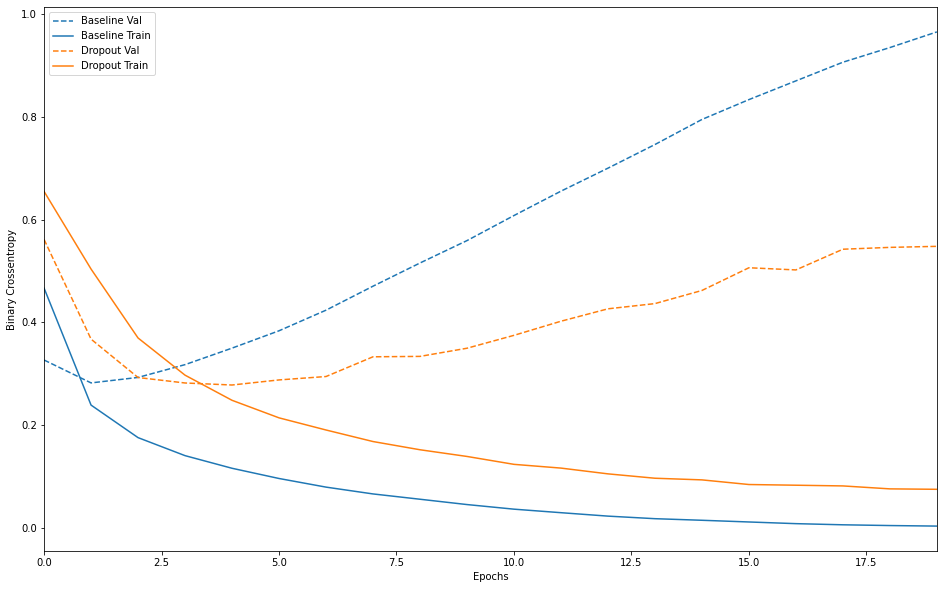

In [ ]:
plot_history([('baseline', baseline_history),
      ('dropout', dpt_model_history)])

In [ ]:
bnt_model = keras.models.Sequential([
    keras.layers.Dense(16, input_shape=(NUM_WORDS,)),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(16),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(1, activation='sigmoid')
])

bnt_model.compile(optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy','binary_crossentropy'])

bnt_model_history = bnt_model.fit(train_data, train_labels,
                  epochs=20,
                  batch_size=512,
                  validation_data=(test_data, test_labels),
                  verbose=2)

Epoch 1/20
49/49 - 5s - loss: 0.4858 - accuracy: 0.7683 - binary_crossentropy: 0.4858 - val_loss: 0.6013 - val_accuracy: 0.8382 - val_binary_crossentropy: 0.6013
Epoch 2/20
49/49 - 2s - loss: 0.2503 - accuracy: 0.9240 - binary_crossentropy: 0.2503 - val_loss: 0.4832 - val_accuracy: 0.8680 - val_binary_crossentropy: 0.4832
Epoch 3/20
49/49 - 2s - loss: 0.1645 - accuracy: 0.9604 - binary_crossentropy: 0.1645 - val_loss: 0.4015 - val_accuracy: 0.8666 - val_binary_crossentropy: 0.4015
Epoch 4/20
49/49 - 2s - loss: 0.1079 - accuracy: 0.9802 - binary_crossentropy: 0.1079 - val_loss: 0.3555 - val_accuracy: 0.8595 - val_binary_crossentropy: 0.3555
Epoch 5/20
49/49 - 2s - loss: 0.0709 - accuracy: 0.9908 - binary_crossentropy: 0.0709 - val_loss: 0.3404 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3404
Epoch 6/20
49/49 - 2s - loss: 0.0456 - accuracy: 0.9967 - binary_crossentropy: 0.0456 - val_loss: 0.3398 - val_accuracy: 0.8563 - val_binary_crossentropy: 0.3398
Epoch 7/20
49/49 - 2s - loss

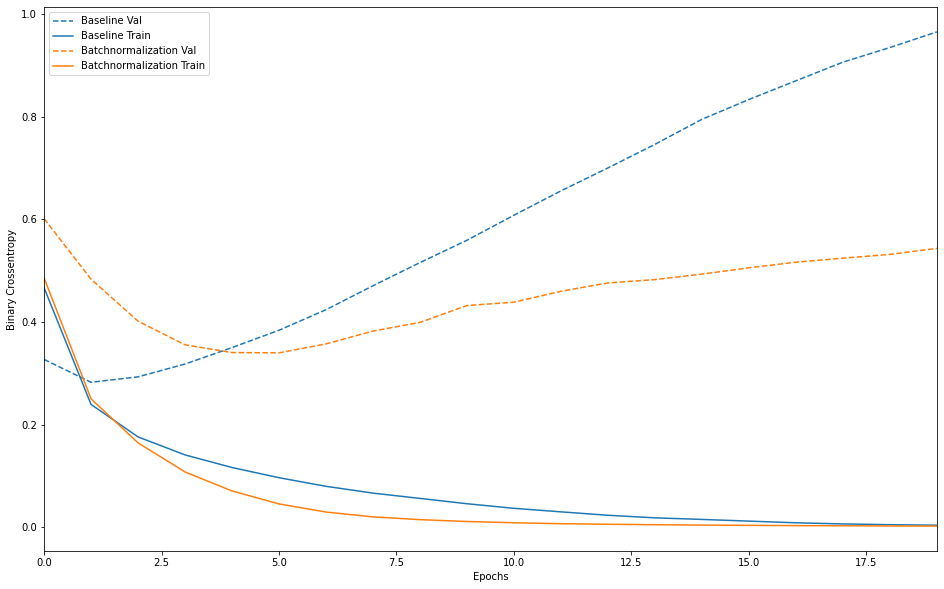

In [ ]:
plot_history([('baseline', baseline_history),
      ('batchnormalization', bnt_model_history)])


以下是防止神经网络过度拟合的最常用方法：

获取更多培训数据。

减少网络容量。

添加体重调整。

添加辍学。